# Astronomical Applications of PCA

## PCA - projecting the data onto a set of orthogonal uncorrelated axes
The observations themselves are already a set of orthogonal bases, the power of PCA is to project the data onto a set of new axes which are aligned with the direction of *maximum variance*.

### Steps of PCA (a.k.a Karhunen–Loève or Hotelling)
1. Pre-process your data (subtract the means, divide by the variances in each dimension, normalize spectra)
    - if the mean is not subracted, the first principal component will denote the mean value, and the second and further components will denote variances (Brunt & Heyer 2002)
2. Implement PCA, i.e. sklearn.decomposition.PCA:
    - initialize PCA class
    - apply to data matrix
    - identify principle and higher order components (maximize variance)
    
    
### Many built-in algorithms for doing the actual decomposition:
- To compute bases from eigenvalues of the covariance matrix: np.linalg.eigh, scipy.linalg.eigh
- To compute bases from SVD: numpy.linalg.svd
- To have the algorithm do it all for you: scikitlearn.decomposition.PCA (uses SVD)

*** Note: linalg.eigh returns eigenvalues in increasing order, you must reorder the returned evals/evecs matricies in decreasing order


# SDSS spectra

Let's start with a sample of galaxy spectra from SDSS. This is a plot of 15 sample galaxies, each has been normalized

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from astroML.datasets import sdss_corrected_spectra

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
def plot():
    # Author: Jake VanderPlas
    # License: BSD
    #   The figure produced by this code is published in the textbook
    #   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
    #   For more information, see http://astroML.github.com
    #   To report a bug or issue, use the following forum:
    #    https://groups.google.com/forum/#!forum/astroml-general

    #----------------------------------------------------------------------
    # Use pre-computed PCA to reconstruct spectra
    data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
    spectra = sdss_corrected_spectra.reconstruct_spectra(data)
    lam = sdss_corrected_spectra.compute_wavelengths(data)

    #------------------------------------------------------------
    # select random spectra
    np.random.seed(5)
    nrows = 5
    ncols = 3
    ind = np.random.randint(spectra.shape[0], size=nrows * ncols)
    spec_sample = spectra[ind]

    #----------------------------------------------------------------------
    # Plot the results
    fig = plt.figure(figsize=(5, 4))

    fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                        bottom=0.1, top=0.95, hspace=0.05)

    for i in range(ncols):
        for j in range(nrows):
            ax = fig.add_subplot(nrows, ncols, ncols * j + 1 + i)
            ax.plot(lam, spec_sample[ncols * j + i], '-k', lw=1)
            ax.set_xlim(3100, 7999)

            ax.yaxis.set_major_formatter(plt.NullFormatter())
            ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
            if j < nrows - 1:
                ax.xaxis.set_major_formatter(plt.NullFormatter())
            else:
                plt.xlabel(r'wavelength $(\AA)$')

            ylim = ax.get_ylim()
            dy = 0.05 * (ylim[1] - ylim[0])
            ax.set_ylim(ylim[0] - dy, ylim[1] + dy)

    plt.show()

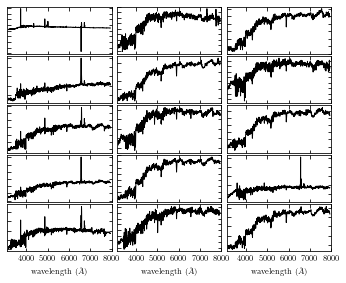

In [39]:
plot()

### Example determining the first 4 eigenspectra of a sample of 2000 SDSS spectra:
Retrieve 2000 random galaxy spectra from SDSS, and use them to compute the mean and first 4 eigenspectra

In [59]:
def plot():
    %matplotlib inline
    #EXAMPLE FOR A set of spectra

    # Example from Andy Connolly
    # See Ivezic, Figure 7.4
    import numpy as np
    from matplotlib import pyplot as plt

    import os

    from sklearn.decomposition import PCA
    from sklearn.decomposition import RandomizedPCA

    from astroML.datasets import sdss_corrected_spectra
    from astroML.decorators import pickle_results

    #------------------------------------------------------------
    # Download data
    data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
    spectra = sdss_corrected_spectra.reconstruct_spectra(data)
    wavelengths = sdss_corrected_spectra.compute_wavelengths(data)##4000 spectra 

    #----------------------------------------------------------------------

    ##prepare for PCA
    np.random.seed(500)
    # Let's look at 2000 random spectra:
    nrows = 2000 
    n_components = 5 # Do the fit with 5 components, which is the mean plus 4
    ##the line above means to stop the PCA computation after 5 eigenvectors are recorded.

    ind = np.random.randint(spectra.shape[0], size=nrows) # narrow to 2000 spec
    spec_mean = spectra[ind].mean(0) # Compute the mean spectrum, which is the first component
    # spec_mean = spectra[:50].mean(0)
    #print spec_mean.shape

    # use Randomized setting for speed
    pca = PCA(n_components=n_components-1, svd_solver='randomized')
    pca.fit(spectra[ind])  ## perform PCA analysis on 
    pca_comp = np.vstack([spec_mean,pca.components_]) #Add the mean to the components
    evals = pca.explained_variance_ratio_ 
    print('Eigenvalues:',evals) # Print the eigenvalues

    %matplotlib inline
    #Make plots
    fig = plt.figure(figsize=(8, 6))
    fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05,
                        bottom=0.1, top=0.95, hspace=0.05)

    titles = 'PCA components'

    for j in range(n_components):

        # plot the components
        ax = fig.add_subplot(n_components, 2, 2*j+2)
        ax.yaxis.set_major_formatter(plt.NullFormatter())
        ax.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            ax.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax.set_xlabel('wavelength (Angstroms)')
        ax.plot(wavelengths, pca_comp[j], '-k', lw=1)

        # plot zero line
        xlim = [3000, 7999]
        ax.plot(xlim, [0, 0], '-', c='gray', lw=1)
        ax.set_xlim(xlim)

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])    
        ax.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)

        # plot the first j spectra
        ax2 = fig.add_subplot(n_components, 2, 2*j+1)
        ax2.yaxis.set_major_formatter(plt.NullFormatter())
        ax2.xaxis.set_major_locator(plt.MultipleLocator(1000))
        if j < n_components - 1:
            ax2.xaxis.set_major_formatter(plt.NullFormatter())
        else:
            ax2.set_xlabel('wavelength (Angstroms)')
        ax2.plot(wavelengths, spectra[j], '-k', lw=1)

        # plot zero line
        ax2.plot(xlim, [0, 0], '-', c='gray', lw=1)
        ax2.set_xlim(xlim)

        if j == 0:
            ax.set_title(titles, fontsize='medium')

        if j == 0:
            label = 'mean'
        else:
            label = 'component %i' % j

        # adjust y limits
        ylim = plt.ylim()
        dy = 0.05 * (ylim[1] - ylim[0])    
        ax2.set_ylim(ylim[0] - dy, ylim[1] + 4 * dy)


        ax.text(0.02, 0.95, label, transform=ax.transAxes,
                ha='left', va='top', bbox=dict(ec='w', fc='w'),
                fontsize='small')


    plt.show()

Eigenvalues: [0.8893158  0.06058301 0.02481432 0.01012148]


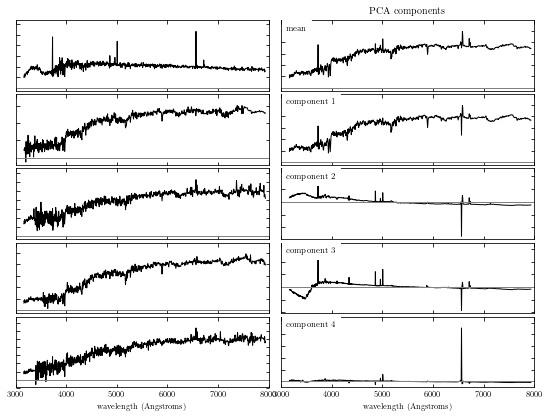

In [52]:
plot()

### You can reconstruct any science spectrum using a combination of N eigenspectra
In this example, we reconstruct a particular spectrum from its eigenspectra.  The input spectrum is shown in grey, and the reconstructed spectrum is shown in black.  By the time we've built up using 20 components, 94% of the variance is modeled, and the reconstruction if very close to the input.

In [44]:
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

def plot():
    # Author: Jake VanderPlas
    # License: BSD
    #   The figure produced by this code is published in the textbook
    #   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
    #   For more information, see http://astroML.github.com
    #   To report a bug or issue, use the following forum:
    #    https://groups.google.com/forum/#!forum/astroml-general
    import numpy as np
    from matplotlib import pyplot as plt

    from sklearn.decomposition import PCA

    from astroML.datasets import sdss_corrected_spectra
    from astroML.utils.decorators import pickle_results

    #------------------------------------------------------------
    # Download data
    data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
    spectra = sdss_corrected_spectra.reconstruct_spectra(data)
    wavelengths = sdss_corrected_spectra.compute_wavelengths(data)

    #------------------------------------------------------------
    # Compute PCA components

    # Eigenvalues can be computed using PCA as in the commented code below:

    #from sklearn.decomposition import PCA
    #pca = PCA()
    #pca.fit(spectra)
    #evals = pca.explained_variance_ratio_
    #evals_cs = evals.cumsum()

    #  because the spectra have been reconstructed from masked values, this
    #  is not exactly correct in this case: we'll use the values computed
    #  in the file compute_sdss_pca.py
    evals = data['evals'] ** 2
    evals_cs = evals.cumsum()
    evals_cs /= evals_cs[-1]
    evecs = data['evecs']
    spec_mean = spectra.mean(0)

    #------------------------------------------------------------
    # Find the coefficients of a particular spectrum
    spec = spectra[1]
    coeff = np.dot(evecs, spec - spec_mean)

    #------------------------------------------------------------
    # Plot the sequence of reconstructions
    fig = plt.figure(figsize=(5, 5))
    fig.subplots_adjust(hspace=0, top=0.95, bottom=0.1, left=0.12, right=0.93)

    for i, n in enumerate([0, 4, 8, 20]):
        ax = fig.add_subplot(411 + i)
        ax.plot(wavelengths, spec, '-', c='gray')
        ax.plot(wavelengths, spec_mean + np.dot(coeff[:n], evecs[:n]), '-k')

        if i < 3:
            ax.xaxis.set_major_formatter(plt.NullFormatter())

        ax.set_ylim(-2, 21)
        ax.set_ylabel('flux')

        if n == 0:
            text = "mean"
        elif n == 1:
            text = "mean + 1 component\n"
            text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]
        else:
            text = "mean + %i components\n" % n
            text += r"$(\sigma^2_{tot} = %.2f)$" % evals_cs[n - 1]

        ax.text(0.02, 0.93, text, ha='left', va='top', transform=ax.transAxes)

    fig.axes[-1].set_xlabel(r'${\rm wavelength\ (\AA)}$')
    plt.show()

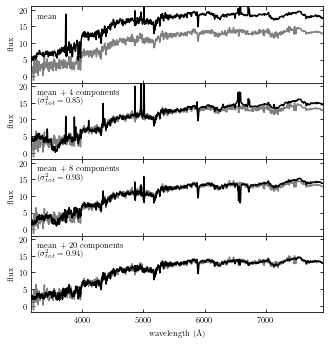

In [45]:
plot()

### Scree plot: ~93% of the information is contained within the first 10 eigenspectra:
This is a scree plot of the eigenvalues of the previous example:

In [46]:
def plot():
    evals_cs = evals.cumsum()
    evals_cs /= evals_cs[-1]

    #------------------------------------------------------------
    # plot the eigenvalues
    fig = plt.figure(figsize=(5, 3.75))
    fig.subplots_adjust(hspace=0.05, bottom=0.12)

    ax = fig.add_subplot(211, xscale='log', yscale='log')
    ax.grid()
    ax.plot(evals, c='k')
    ax.set_ylabel('Normalized Eigenvalues')
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.set_ylim(5E-4, 100)

    ax = fig.add_subplot(212, xscale='log')
    ax.grid()
    ax.semilogx(evals_cs, color='k')
    ax.set_xlabel('Eigenvalue Number')
    ax.set_ylabel('Cumulative Eigenvalues')
    ax.set_ylim(0.65, 1.00)

    plt.show()

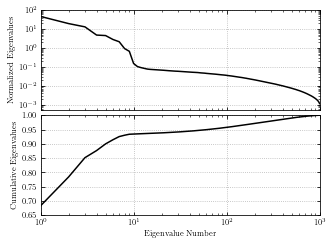

In [47]:
plot()

This is a way to compensate for missing data in your galaxy spectrum.  Use eigenspectra to build a reconstruction of your data to "fill in the blanks"

In [57]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

def plot():
    # License: BSD
    #   The figure produced by this code is published in the textbook
    #   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
    #   For more information, see http://astroML.github.com
    #   To report a bug or issue, use the following forum:
    #    https://groups.google.com/forum/#!forum/astroml-general
    import numpy as np
    from matplotlib import pyplot as plt
    from matplotlib import ticker

    from astroML.datasets import fetch_sdss_corrected_spectra
    from astroML.datasets import sdss_corrected_spectra

    #------------------------------------------------------------
    # Get spectra and eigenvectors used to reconstruct them
    data = fetch_sdss_corrected_spectra()
    spec = sdss_corrected_spectra.reconstruct_spectra(data)
    lam = sdss_corrected_spectra.compute_wavelengths(data)
    evecs = data['evecs']
    mu = data['mu']
    norms = data['norms']
    mask = data['mask']

    #------------------------------------------------------------
    # plot the results
    i_plot = ((lam > 5750) & (lam < 6350))
    lam = lam[i_plot]

    specnums = [20, 8, 9]
    subplots = [311, 312, 313]

    fig = plt.figure(figsize=(5, 6.25))
    fig.subplots_adjust(left=0.09, bottom=0.08, hspace=0, right=0.92, top=0.95)

    for subplot, i in zip(subplots, specnums):
        ax = fig.add_subplot(subplot)

        # compute eigen-coefficients
        spec_i_centered = spec[i] / norms[i] - mu
        coeffs = np.dot(spec_i_centered, evecs.T)

        # blank out masked regions
        spec_i = spec[i]
        mask_i = mask[i]
        spec_i[mask_i] = np.nan

        # plot the raw masked spectrum
        ax.plot(lam, spec_i[i_plot], '-', color='k',
                label='True spectrum', lw=1.5)

        # plot two levels of reconstruction
        for nev in [10]:
            if nev == 0:
                label = 'mean'
            else:
                label = 'reconstruction\n(nev=%i)' % nev
            spec_i_recons = norms[i] * (mu + np.dot(coeffs[:nev], evecs[:nev]))
            ax.plot(lam, spec_i_recons[i_plot], label=label, color='grey')

        # plot shaded background in masked region
        ylim = ax.get_ylim()
        mask_shade = ylim[0] + mask[i][i_plot].astype(float) * ylim[1]
        plt.fill(np.concatenate([lam[:1], lam, lam[-1:]]),
                 np.concatenate([[ylim[0]], mask_shade, [ylim[0]]]),
                 lw=0, fc='k', alpha=0.2)

        ax.set_xlim(lam[0], lam[-1])
        ax.set_ylim(ylim)
        ax.yaxis.set_major_formatter(ticker.NullFormatter())

        if subplot == 311:
            ax.legend(loc=1)

        ax.set_xlabel('$\lambda\ (\AA)$')
        ax.set_ylabel('normalized flux')

    plt.show()

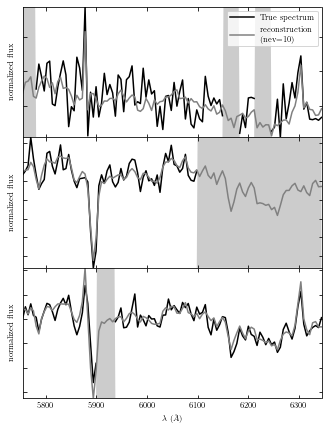

In [58]:
plot()

# Imaging

A set of reference images can be used to form a basis set of eigenimages.  Each eigenimage is an orthogonal direction from which the images differ from the the mean image.  Then, a linear combination of these eigenimages can be formed that reconstructs a given target image by projecting the target image onto the basis set.  If a set of M refrence images is used to construct N $\le$ M eigenimages, then a target image can be reconstructed using appropriately weighted K eigenimages. image1 = (23% of E1) + (2% of E2) + (51% of E3) + ... + (1% En).  Dimensionality reduction is acheived in that K $\lt$ N. 

This is how your phone recognizes your face!  The set of eigenimages is produced by performing PCA on a large set of images.


Steps for using PCA in imaging:
- Prepare a set of reference images to construct the basis set.  Each image should be same size and resolution, and aligned.  Concatenate each reference image into a single vector.  
    - Ex: If you have a training set of T = rxmxn images, turn them into T = rxp array where p = mxn.  np.reshape() function works well for this.
- Subtract the mean from each reference image
- Perform pca on the covariance matix of T to get the eigenvalues and eigenvectors (eigenimages)
- Sort eigenvalues in decending order
- Determine the number of principle components, k, desired to use in reconstruction
- Project the target image onto the basis set

> [PCA on astronomical images, including the math: Soummer+ 2012](https://iopscience.iop.org/article/10.1088/2041-8205/755/2/L28/pdf)

### PCA on imaging is used in PSF subtraction: RDI
Reference differential imaging (RDI): Build a set of eigenimages from PSF reference stars, construct a model PSF of your science target, and subtract the star's PSF model from the image to reveal faint planets/disks.

My science is called BDI: Binary Differential Imaging.  In binaries where both stars fit on the detector (in the same isoplanatic angle of the AO system) but are far enough apart to be well resolved, we can use the PSF of one star as a set of reference images for the other, and vice versa.  The advantage is that the reference star and science target are imaged at the same time and in the same conditions, so it should provide a superior set of reference images for modeling the science target's stellar flux using PCA, comapred to reference stars not imaged simultaneously.


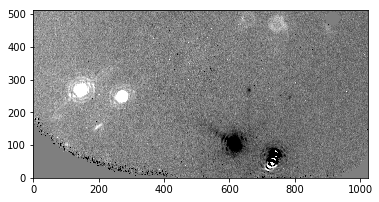

In [1]:
from astropy.io import fits
from astropy.visualization import ZScaleInterval, ImageNormalize

image = fits.getdata('lecture10_files/BDI0933__00001.fit')

%matplotlib inline
plt.imshow(image,origin='lower',cmap='gray',norm = ImageNormalize(image, interval=ZScaleInterval(),))
plt.show()

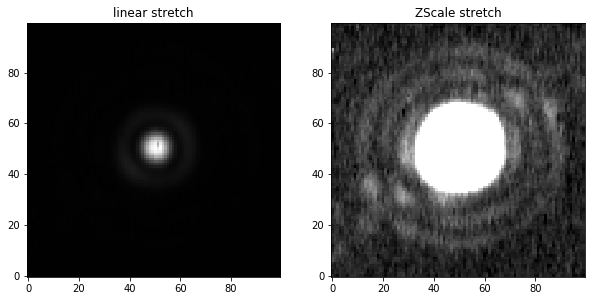

In [2]:
# Cut out just the interested star A as the science target:
x,y = 147, 268
science_target = image[np.int_(y-50):np.int_(y+50),np.int_(x-50):np.int_(x+50)]
    
plt.figure(figsize=(10,5))
# Linear stretch:
plt.subplot(121)
plt.imshow(science_target,origin='lower',cmap='gray')
plt.title('linear stretch')
# ZScale stretch:
plt.subplot(122)
plt.imshow(science_target,origin='lower',cmap='gray',norm = ImageNormalize(science_target, interval=ZScaleInterval(),))
plt.title('ZScale stretch')
plt.show()

My homebrewed PCA algorithm produced these eigenimages using all frames of star B:

In [49]:
def plot():
    eigenimages = fits.getdata('lecture10_files/eigenimages.fits')

    plt.figure(figsize=(12,8))
    i=0
    plt.subplot(231)
    plt.imshow(eigenimages[i], origin='lower',cmap='gray',\
               norm = ImageNormalize(eigenimages[i], interval=ZScaleInterval(),))
    plt.title('Component = '+str(i))
    i=1
    plt.subplot(232)
    plt.imshow(eigenimages[i], origin='lower',cmap='gray',\
               norm = ImageNormalize(eigenimages[i], interval=ZScaleInterval(),))
    plt.title('Component = '+str(i))
    i=10
    plt.subplot(233)
    plt.imshow(eigenimages[i], origin='lower',cmap='gray',\
               norm = ImageNormalize(eigenimages[i], interval=ZScaleInterval(),))
    plt.title('Component = '+str(i))
    i=25
    plt.subplot(234)
    plt.imshow(eigenimages[i], origin='lower',cmap='gray',\
               norm = ImageNormalize(eigenimages[i], interval=ZScaleInterval(),))
    plt.title('Component = '+str(i))
    i=50
    plt.subplot(235)
    plt.imshow(eigenimages[i], origin='lower',cmap='gray',\
               norm = ImageNormalize(eigenimages[i], interval=ZScaleInterval(),))
    plt.title('Component = '+str(i))
    i=65
    plt.subplot(236)
    plt.imshow(eigenimages[i], origin='lower',cmap='gray',\
               norm = ImageNormalize(eigenimages[i], interval=ZScaleInterval(),))
    plt.title('Component = '+str(i))
    plt.tight_layout()

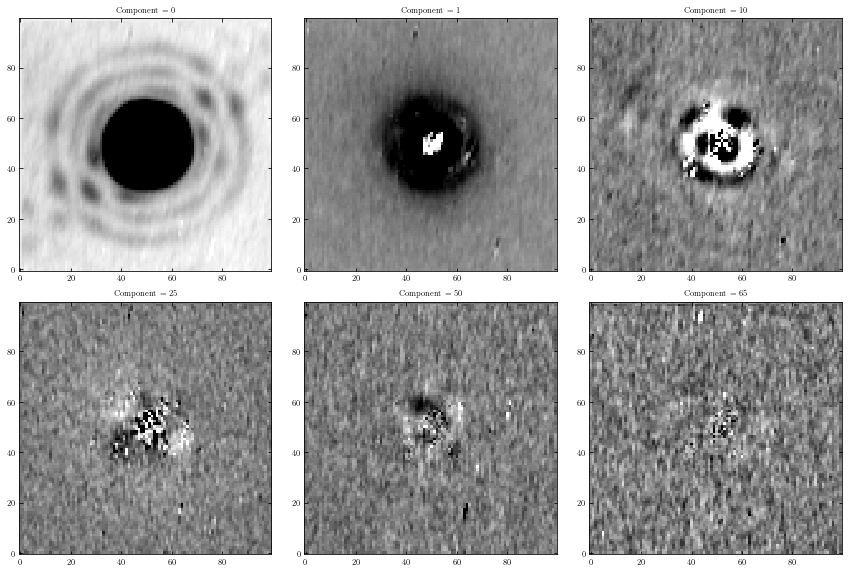

In [50]:
plot()

Scree plot for these eigenimages:
<img src="lecture10_files/scree.png" />

And the final subtracted image using 10 components (also derotated; this is a work in progress, and more work needs to be done to subtract the starlight better than this!)

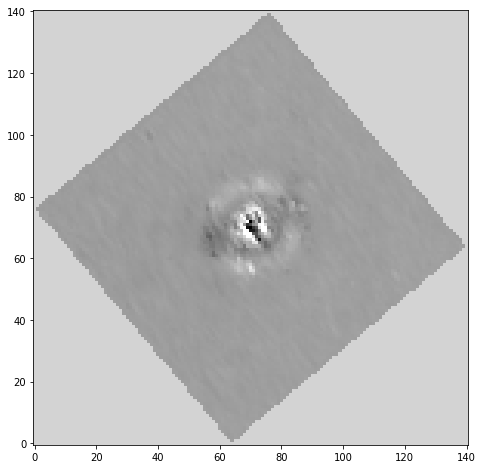

In [17]:
psfsub = fits.getdata('lecture10_files/psfsub.fits')

plt.figure(figsize = (8,8))
plt.imshow(psfsub, origin='lower',cmap='gray',\
           norm = ImageNormalize(psfsub, interval=ZScaleInterval(),))
plt.show()

### How many eigenimages to use?

Dilema: fully subtract the starlight without subtracting any planet signal.  
Trade off: 
- too few modes = insufficient starlight subtraction
- too many modes = subtracting flux from the faint planet
Each image and science case is different and requires fine-tuning.  

The Gemini Planet Imager (GPI) team recommends 20-50 modes for planets, 1-10 modes for disks (but that's specific to their instrument!)


Example: GPI image of Beta Pic b:

Image source: pyKLIP documentation, GPI team. 
>[https://pyklip.readthedocs.io/](https://pyklip.readthedocs.io/)

<img src="https://pyklip.readthedocs.io/en/latest/_images/betpic_j_klmodes_cube.gif" />